<a href="https://colab.research.google.com/github/lkarjun/malayalam-language-model/blob/main/Data-Preprocessing/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Downloading

In [1]:
!pip install -qq dvc[gdrive]

!dvc get https://github.com/lkarjun/malayalam-language-model \
Datasets/

     |████████████████████████████████| 401 kB 27.2 MB/s 
     |████████████████████████████████| 216 kB 43.7 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 280 kB 44.9 MB/s 
     |████████████████████████████████| 48 kB 5.7 MB/s 
     |████████████████████████████████| 109 kB 43.3 MB/s 
     |████████████████████████████████| 133 kB 35.9 MB/s 
     |████████████████████████████████| 44 kB 3.3 MB/s 
     |████████████████████████████████| 41 kB 32 kB/s 
     |████████████████████████████████| 180 kB 54.8 MB/s 
     |████████████████████████████████| 287 kB 27.1 MB/s 
     |████████████████████████████████| 548 kB 41.9 MB/s 
     |████████████████████████████████| 4.5 MB 37.1 MB/s 
     |████████████████████████████████| 1.1 MB 8.7 MB/s 
     |████████████████████████████████| 3.6 MB 43.2 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 55 kB 4.5 MB/s 
     |██████████████████████

In [18]:
!unzip -q 'Datasets/*.zip' -d Datasets/


3 archives were successfully processed.


# Packages importing

In [3]:
!pip install -qq fastai==2.5.3
!pip install -qq textacy

     |████████████████████████████████| 189 kB 7.1 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 200 kB 23.8 MB/s 
     |████████████████████████████████| 132 kB 66.9 MB/s 
     |████████████████████████████████| 481 kB 49.5 MB/s 
     |████████████████████████████████| 2.0 MB 58.5 MB/s 
     |████████████████████████████████| 6.0 MB 44.2 MB/s 
     |████████████████████████████████| 10.1 MB 43.1 MB/s 
     |████████████████████████████████| 42 kB 1.7 MB/s 
     |████████████████████████████████| 451 kB 55.1 MB/s 
     |████████████████████████████████| 181 kB 64.9 MB/s 
     |████████████████████████████████| 628 kB 34.7 MB/s 


In [5]:
import pandas as pd
from tqdm import tqdm
from pathlib import Path
import textacy.preprocessing as tprep
import re

tqdm.pandas(colour = 'red')

BASE_PATH = Path("Datasets/")

In [153]:
from fastai.text.core import *
from fastai.text.all import *

# Dataset Loading

In [19]:
mag = pd.read_csv(BASE_PATH/'magazine_files.csv')
wiki = pd.read_csv(BASE_PATH/'wikitext_files.csv')
art = pd.read_csv(BASE_PATH/'article_files.csv')

In [38]:
def open_files(path: str):
    with open(path, 'r', encoding='utf-8') as file:
        txt = file.read()
    return txt

mag['content'] = mag['file_path'].progress_apply(open_files)
wiki['content'] = wiki['file_path'].progress_apply(open_files)
art['content'] = art['file_path'].progress_apply(open_files)

100%|██████████| 15568/15568 [00:00<00:00, 17716.83it/s]


In [21]:
art.sample()

,file_path,dataset_name,content
12936,Datasets/articles_raw/article13034.txt,article_text,"ഈ സെലിബ്രിറ്റി അമ്മമാരൊക്കെ എങ്ങനെയാ കുട്ടികളെ വളർത്തുന്നത്? അവർക്ക് കുട്ടികൾക്കൊപ്പം കളിക്കാനും അവർക്കൊപ്പം സമയം പങ്കിടാനുമൊക്കെ സാധിക്കാറുണ്ടോ? അതോ ഈ സിനിമാ തിരക്കിനിടയിൽ കുട്ടികളുടെ കാര്യങ്ങളിൽ ഇടപെടാൻ സമയം കിട്ടാറില്ലേ? ഇങ്ങനെ നൂറുകൂട്ടം സംശയംകാണും നമുക്കെല്ലാം അല്ലേ? ബോളിവുഡിലെ എനർജറ്റിക് താരമായ കജോളിന്റെ പേരന്റിങ് മന്ത്രങ്ങൾ സൂപ്പറാ... ബോളിവുഡിലെ ഏറ്റവും കൂളസ്റ്റും അടിപൊളിയുമായ അമ്മയാണ് കജോൾ എന്നാണ് പറയപ്പെടുന്നത്. സിനിമയിൽ തിളങ്ങി നിന്നപ്പോഴാണ് വിവാഹിതയായതും അമ്മയായതും സിനിമയിൽ നിന്ന് പതിയെ വിട്ടുനിന്നതും. അജയ് ദേവ്ഗണിനും കജോളിനും മക്കൾ രണ്ടാണ്. മൂത്തയാൾ നൈസ, രണ്ടാമൻ യു..."


In [22]:
wiki.sample()

,file_path,dataset_name,content
5692,Datasets/wikitext_raw/wiki6300.txt,wiki_text,"ഒരു ഒറിയ അഭിനേത്രിയാണ് തന്ദ്ര റായ് "". 80-90 കാലഘട്ടങ്ങളിൽ ഒറിയ സിനിമകളിൽ അഭിനയിച്ചിട്ടുണ്ട്. ബിജയ് മൊഹന്തിയാണ് ഭർത്താവ്. ബിജയ് മൊഹന്തിയുടെ കൂടെ അഭിനയിച്ച ചിൽക തിരെ ആണ് അവരുടെ ആദ്യചിത്രം.\nഇന്റർനെറ്റ് മൂവി ഡാറ്റാബേസിൽ നിന്ന് തന്ദ്ര റായ്\n"


In [23]:
mag.sample()

,file_path,dataset_name,content
1422,Datasets/magazine_raw/mag1453.txt,magazine_text,"ഉത്തർപ്രദേശിൽ നിന്ന് ഇന്നലെ വീണ്ടുമൊരു ബലാത്സംഗ വാർത്ത കൂടി റിപ്പോർട്ട് ചെയ്യപ്പെട്ടിരിക്കുകയാണ്. ഉന്നതപഠനത്തിനുള്ള സ്‌കോളർഷിപ്പിന് അപേക്ഷിക്കാൻ വേണ്ടി, ലാഖിം‌പൂര്‍ ഖേരി ജില്ലയിലെ ഒരു ഗ്രാമത്തിൽ നിന്ന് പട്ടണത്തിലേക്ക് പോയ ഒരു പതിനേഴുകാരിയാണ് ഓഗസ്റ്റ് 25 -ന് അതിക്രൂരമായി കൊലചെയ്യപ്പെട്ടത്. ക്രൂരമായി ബലാത്സംഗം ചെയ്യപ്പെട്ട് കഴുത്തറുത്ത നിലയില്‍ വെള്ളമില്ലാത്ത കുളത്തിലാണ് മൃതദേഹം കണ്ടെത്തിയത്. പെണ്‍കുട്ടിയുടെ ഗ്രാമത്തിന്റെ 200 മീറ്റര്‍ അകലെയായിരുന്നു മൃതദേഹം ഉപേക്ഷിക്കപ്പെട്ട നിലയിൽ കണ്ടെത്തിയത്. തിങ്കളാഴ്ച രാവിലെ എട്ടരയോടെ, സ്‌കോളർഷിപ്പിനുള്ള അപേക്ഷാ ഫോറം ഫിൽ ചെയ്യാൻ എന്നും പറഞ്ഞ് വീട്ടിൽ നി..."


# Preprocessing

## Checking impurity

In [24]:
RE_SUSPICIOUS = re.compile(r'\(.*?\)|[a-zA-Z]')

def check_impurity(content: str, min_len = 200):
    '''returns the share of suspicious characters in a text'''
    len_text = len(content)
    if content == None or len_text < min_len:
        return 0
    return len(RE_SUSPICIOUS.findall(content)) / len_text


In [36]:
mag['impurity'] = mag['content'].progress_apply(check_impurity)
wiki['impurity'] = wiki['content'].progress_apply(check_impurity)
art['impurity'] = art['content'].progress_apply(check_impurity)

100%|██████████| 15568/15568 [00:01<00:00, 10815.69it/s]


In [ ]:
print("----------------------------------------------------------\n")
print("Total Magazine Files: ", len(mag))
print("Total Impure Magazine Files: ", len(mag[mag['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total Magazine Files:  7863
Total Impure Magazine Files:  324

----------------------------------------------------------


In [ ]:
print("----------------------------------------------------------\n")
print("Total WikiText Files: ", len(wiki))
print("Total Impure  WikiText Files: ", len(wiki[wiki['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total WikiText Files:  12388
Total Impure  WikiText Files:  1161

----------------------------------------------------------


In [29]:
print("----------------------------------------------------------\n")
print("Total Article Files: ", len(art))
print("Total Impure  Article Files: ", len(art[art['impurity'] >= .03]))
print("\n----------------------------------------------------------")

----------------------------------------------------------

Total Article Files:  16724
Total Impure  Article Files:  1156

----------------------------------------------------------


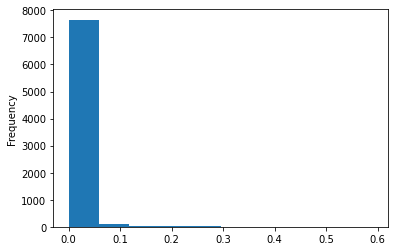

In [ ]:
mag.impurity.plot.hist();

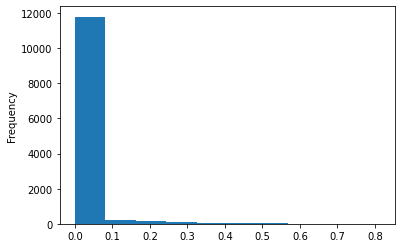

In [ ]:
wiki.impurity.plot.hist();

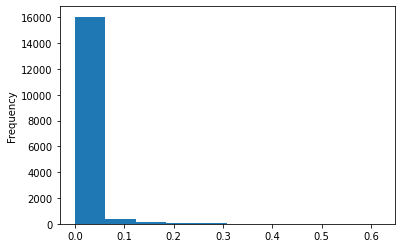

In [30]:
art.impurity.plot.hist();

In [37]:
mag = mag[mag['impurity'] <= .03].drop(['impurity', 'content'], axis = 1)
wiki = wiki[wiki['impurity'] <= .03].drop(['impurity', 'content'], axis = 1)
art = art[art['impurity'] <= .03].drop(['impurity', 'content'], axis = 1)

In [33]:
mag.to_csv(BASE_PATH/'magazine_files.csv', index = False)
wiki.to_csv(BASE_PATH/'wikitext_files.csv', index = False)
art.to_csv(BASE_PATH/'wikitext_files.csv', index = False)

## Checking Word Tokenizer

In [ ]:
tok = WordTokenizer(lang='ml')

In [ ]:
def get_sample(wiki_=True, size = 1, random_state = 32):
    if wiki_:
        return first(wiki.sample(size)['content'], random_state=32)
    return first(mag.sample(size)['content'], random_state=32)

In [ ]:
coll_repr(first(tok([get_sample()])), 50)

"(#48) ['ഭാരതീയസംഗീതപദ്ധതികളിൽ','ഉപയോഗിക്കപ്പെടുന്ന','സപ്തസ്വരങ്ങളിൽ','അഞ്ചാമത്തേതാണ്\\u200c','പഞ്ചമം.','സ്വരം','പാടുന്നതിനും','സൂചിപ്പിക്കുന്നതിനും','പ','എന്ന','അക്ഷരം','ഉപയോഗിക്കുന്നു.','കർണ്ണാടകസംഗീതത്തിൽ','ഷഡ്ജവും','പഞ്ചമവും','പ്രകൃതിസ്വരങ്ങളായി','കണക്കാക്കുന്നു.','പഞ്ചമത്തെ','കുയിലിന്റെ','സ്വരത്തോടാണ്\\u200c','താരതമ്യപ്പെടുത്താറുള്ളത്.','\\n','ഭാരതീയശാസ്ത്രീയസംഗീതപദ്ധതികളിൽ','ശ്രുതിഭേദങ്ങളില്ലാത്ത','പ്രകൃതിസ്വരങ്ങളായ','ഷഡ്ജം',',','പഞ്ചമം','എന്നിവ','മീട്ടുന്ന','രീതിയിലാണ്\\u200c','വയലിൻ',',','വീണ','മുതലായവയുടെ','കമ്പികൾ','ക്രമീകരിക്കുന്നത്.','\\n','കർണ്ണാടകസംഗീത','സംഗീതവുമായി','ബന്ധപ്പെട്ട','ഈ','ലേഖനം','അപൂർണ്ണമാണ്\\u200c.','ഇതു','വികസിപ്പിക്കുവാൻ','സഹായിക്കുക.','\\n']"

In [ ]:
# 'പഞ്ചമം.' tokenizer is not separating the fullstop. its due to unicode.

In [ ]:
coll_repr(first(tok([get_sample(False)])), 50)

"(#443) ['ട്രാഫിക്','രാമസ്വാമി','എന്നറിയപ്പെടുന്ന','കെ.','ആർ','രാമസ്വാമി','ഒരു','അഴിമതി','വിരുദ്ധ','പ്രവർത്തകനാണ്.','ഉന്നതരുടെയും','ശക്തരുടെയും','അനധികൃത','പോസ്റ്ററുകളും','പരസ്യബോർഡുകളും','ചെന്നൈയിലെ','തെരുവോരങ്ങളിൽ','നിന്ന്','എടുത്തുമാറ്റാനുള്ള','ശ്രമങ്ങളാണ്','രാമസ്വാമിയെ','വ്യത്യസ്\\u200dതനാക്കിയത്.','അതിനായി','കോടതിയെ','സമീപിക്കാനും','അദ്ദേഹം','മടി','കാണിച്ചിരുന്നില്ല.','തന്റെ','വഴിയിൽ','ഒരു','തടസമാകാൻ','വാർദ്ധക്യത്തെ','അദ്ദേഹം','ഒരിക്കലും','അനുവദിച്ചിരുന്നുമില്ല.','എന്നാൽ',',','ജനങ്ങളുടെ','ആവശ്യങ്ങൾക്ക്','വേണ്ടി','പ്രവർത്തിച്ച','അദ്ദേഹം','ഹൃദയാഘാതത്തെ','തുടർന്ന്','ചൊവ്വാഴ്ച','രാത്രി','ചെന്നൈയിലെ','രാജീവ്','ഗാന്ധി'...]"

In [ ]:
sample = '''മികച്ച... മെക്സിക്കന്‍. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! കരീബിയന്‍ സമുദ്രത്തില്‍ തിമിംഗലക്കുഞ്ഞുങ്ങള്‍ക്കൊപ്പം കുളിക്കണം അങ്ങനെ... അങ്ങനെ... ഒരു വിനോദസഞ്ചാരിയാവുകയാണ് ജോലി... ശമ്പളമോ വര്‍ഷത്തില്‍ എണ്‍പത് ലക്ഷത്തിനു മുകളില്‍. ഭക്ഷണത്തിനുള്ള കാര്‍ഡുകളും, "യാത്രാ" ചെലവും പുറമേയും കിട്ടും. അപേക്ഷ അയച്ച് തെരഞ്ഞെടുക്കപ്പെട്ടാല്‍ റിസോര്‍ട്ടിന്‍റെ ബ്രാൻഡ് അംബാസഡറായി മാറാം. '''

In [ ]:
coll_repr(first(tok([sample])), 10)

"(#41) ['മികച്ച','...','മെക്സിക്കന്\\u200d.','ഷെഫ്-ഉണ്ടാക്കുന്',';','.ഭക്ഷണം','കഴിക്കണം','!','കരീബിയന്\\u200d','സമുദ്രത്തില്\\u200d'...]"

In [42]:
from spacy.tokenizer import Tokenizer as sTokenizer
from spacy.util import compile_prefix_regex, \
 compile_infix_regex, compile_suffix_regex
import spacy

In [58]:
nlp = spacy.blank('ml')

prefixes = [pattern for pattern in nlp.Defaults.prefixes
             if pattern not in ['-', '_', '#']]
             
suffixes = [pattern for pattern in nlp.Defaults.suffixes
             if pattern not in ['_']] + ['.']
            
infixes =  [pattern for pattern in nlp.Defaults.infixes
            if not re.search(pattern, 'xx-xx')]


nlp.tokenizer = sTokenizer(vocab = nlp.vocab,
                    rules = nlp.Defaults.tokenizer_exceptions,
                    prefix_search = compile_prefix_regex(prefixes).search,
                    suffix_search = compile_suffix_regex(suffixes).search,
                    infix_finditer = compile_infix_regex(infixes).finditer,
                    token_match = nlp.Defaults.token_match
                    )


In [59]:
sample = '''മികച്ച... മെക്സിക്കന്‍. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! '''

sample = sample.replace("...", '…').replace('..', '…')
sample

'മികച്ച… മെക്സിക്കന്\u200d. ഷെഫ്-ഉണ്ടാക്കുന്; .ഭക്ഷണം കഴിക്കണം! '

In [64]:
list(nlp(sample))[:5] # still not working

[മ, ി, ക, ച, ്]

## Cleaning

In [74]:
nlp = spacy.blank('ml')

import html

def replace_words(txt: str, word: str, repl: str):
    txt = txt.replace(word, repl)
    return txt


def replace_symbol(text):
    text = replace_words(text, '??', '?')
    text = replace_words(text, '...', '…')
    text = replace_words(text, '..', '…')
    text = replace_words(text, '.', ' . ')
    text = re.sub(r'\(.*?\)', '', text)
    return text

def remove_miscellaneous(text):
    text = re.sub('[a-zA-Z]', '', text)
    text = re.sub(r'<[^<>]*>', ' ', text)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

def clean(text):
    text = html.unescape(text)
    text = replace_symbol(text)
    text = remove_miscellaneous(text)
    return text.strip()

def make_perfect(txt: str):
    txt = ' '.join(map(str, list(nlp(clean(txt)))))
    return txt



In [86]:
print(make_perfect(mag['content'][2][:50]))

ജീവിതത്തോടുള്ള ആര്‍ത്തി . അതായിരുന്നു , വനം വകുപ്പിന


In [87]:
mag['content'] = mag['content'].progress_apply(make_perfect)
wiki['content'] = wiki['content'].progress_apply(make_perfect)
art['content'] = art['content'].progress_apply(make_perfect)

100%|██████████| 15568/15568 [01:14<00:00, 208.28it/s]


## Checking Subword Tokenizer

In [212]:
txts = L(Path(o).open().read() for o in art[:3000]['file_path'])

txt = txts[1]

In [213]:
txts[1]

'മുടിയുടെ അനാരോഗ്യത്തിന് കാരണങ്ങള്\u200d പലതുണ്ട്. ജീവിതശൈലിയിലെ അശ്രദ്ധകള്\u200d, അനാരോഗ്യകരമായ ആഹാരരീതി, അമിതമായോ അകാലത്തിലോ ഉള്ള ഉറക്കം, ഗര്\u200dഭാവസ്ഥ, പ്രസവം, ആര്\u200dത്തവവിരാമം, തൈറോയ്ഡ് രോഗങ്ങള്\u200d, ജോലിയുടെ പ്രത്യേകതകള്\u200d എന്നിവയും ചില മരുന്നുകള്\u200d കഴിക്കുന്നതും മുടികൊഴിച്ചിലിന് കാരണമാകാം. ഹോര്\u200dമോണ്\u200d പ്രശ്നങ്ങള്\u200d മൂലമുള്ള മുടികൊഴിച്ചില്\u200d സങ്കീര്\u200dമാണ്. ഇവിടെ മുടിയുടെ വളര്\u200dച്ചാസമയം ഗണ്യമായി കുറയുന്നു. ഇത് രോമകൂപത്തിന്റെ വിശ്രമാവസ്ഥയെ ദീര്\u200dഘിപ്പിക്കുന്നു. ഇപ്രകാരം വളര്\u200dച്ചാചക്രത്തിലെ വ്യതിയാനങ്ങള്\u200d മുടിയുടെ സാന്ദ്രത കുറയ്ക്കുന്നു. മാനസികപിരിമുറുക്കവും മുടിയുടെ ആരോഗ്യത്തെ സാരമായി ബാധിക്കുന്നതാണ്. ആയുര്\u200dവേദത്തില്\u200d മുടികൊഴിച്ചിലിനെ ഖലിതം എന്നാണ് വിളിക്കുന്നത്. ചരകസംഹിതയില്\u200d ശിരോരോഗങ്ങളുടെയും സുശ്രുതസംഹിതയില്\u200d ക്ഷുദ്രരോഗങ്ങളുടെയും ഗണത്തിലാണ് ഖലിതത്തെ ഉള്\u200dപ്പെടുത്തിയിട്ടുള്ളത്. ത്രിദോഷജന്യമായാണ് ആയുര്\u200dവേദം ഈ അവസ്ഥയെ കാണുന്നത്. ശിരസ്സിലെ രോഗങ്ങള്\u200dക്ക് ഏറ്റവും പ്രധാന ചികിത്സയാണ് മൂക്കില്\u200dക്ക

In [214]:
sp = SubwordTokenizer('ml', vocab_sz = 10000)

In [215]:
sp.setup(txts)

{'sp_model': Path('tmp/spm.model')}

In [229]:
' '.join(Tokenizer(sp)(txt))

'▁xxbos ▁മുടിയ ുടെ ▁അന ാരോഗ്യ ത്തിന് ▁കാരണങ്ങള ് \u200d ▁പല ത ുണ്ട് . ▁ജീവിത ശ ൈല ിയിലെ ▁അ ശ്രദ്ധ കള് \u200d , ▁അന ാരോഗ്യ കരമായ ▁ആഹാര രീതി , ▁അമിതമായ ോ ▁അ കാല ത്തില ോ ▁ഉള്ള ▁ഉറക്ക ം , ▁ഗര ് \u200d ഭ ാവസ്ഥ , ▁പ്രസവ ം , ▁ആര് \u200d ത്ത വ വി രാമ ം , ▁തൈ റോ യ ് ഡ് ▁രോഗങ്ങള ് \u200d , ▁ജോലി യുടെ ▁പ്രത്യേകതകള ് \u200d ▁എന്നിവ യും ▁ചില ▁മരുന്നുകള ് \u200d ▁കഴിക്കുന്നത ും ▁ മുടി ക ൊഴിച്ച ില ിന് ▁കാരണമാക ാം . ▁ഹോ ര് \u200d മോ ണ് \u200d ▁പ്രശ്നങ്ങള ് \u200d ▁മൂല മുള്ള ▁ മുടി ക ൊഴിച്ച ില് \u200d ▁സങ്കീ ര് \u200d മാണ് . ▁ഇവിടെ ▁മുടിയ ുടെ ▁വളര ് \u200d ച്ചാ സമയം ▁ഗണ്യമായ ി ▁കുറയുന്ന ു . ▁ഇത് ▁രോമ കൂ പ ത്തിന്റെ ▁വിശ്രമ ാവസ്ഥ യെ ▁ദീ ര് \u200d ഘ ിപ്പിക്കുന്ന ു . ▁ഇ പ്രകാരം ▁വളര ് \u200d ച്ചാ ചക്ര ത്തിലെ ▁വ്യതിയാനങ്ങള ് \u200d ▁മുടിയ ുടെ ▁സാന് ദ്ര ത ▁കുറയ്ക്ക ുന്നു . ▁മാനസിക പി രി മുറ ു ക്കവും ▁മുടിയ ുടെ ▁ആരോഗ്യ ത്തെ ▁ സാരമായി ▁ബാധിക്കുന്ന താണ് . ▁ആയു ര് \u200d വേദ ത്തില് \u200d ▁ മുടി ക ൊഴിച്ച ില ിനെ ▁ഖ ലി ത ം ▁എന്നാണ് ▁വിളിക്കുന്നത് . ▁ചര ക സംഹിത യില് \u200d ▁ ശി രോ രോഗ ങ്ങളുടെ യും ▁സു ശ്ര ുത സംഹിത യ